In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from folium import plugins 
%config InlineBackend.figure_format = 'retina' #Use this %config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 8, 5 #You can dynamically change the default rc (runtime configuration) settings in a python 
#script or interactively from the python shell.
pd.options.mode.chained_assignment = None  #The warning went away and my code runs faster. 
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as matplotlib


In [2]:
df=pd.read_csv("binary_info.csv")

In [3]:
df

,mmsi,gear_type,length,tonnage,engine_power,country,IUU Fishing,illegal_fishing
0,603100157,trawlers,32.808468,299.003814,733.826977,Angola,2.37,0
1,603100137,trawlers,34.568782,395.683171,864.960188,Angola,2.37,0
2,603100161,trawlers,28.822140,263.849149,651.809642,Angola,2.37,0
3,603100174,trawlers,30.721429,299.700916,703.796086,Angola,2.37,0
4,603100164,trawlers,37.479248,405.967747,850.976640,Angola,2.37,0
...,...,...,...,...,...,...,...,...
66193,601764000,drifting_longlines,17.032258,52.550920,207.818629,South Africa,2.43,0
66194,601089100,drifting_longlines,22.915622,180.506028,527.507463,South Africa,2.43,0
66195,601849000,drifting_longlines,19.692080,86.485661,362.553279,South Africa,2.43,0
66196,601183700,drifting_longlines,31.872860,307.446773,977.330342,South Africa,2.43,0


In [4]:
df.isnull().sum()

mmsi               0
gear_type          0
length             0
tonnage            0
engine_power       0
country            0
IUU Fishing        0
illegal_fishing    0
dtype: int64

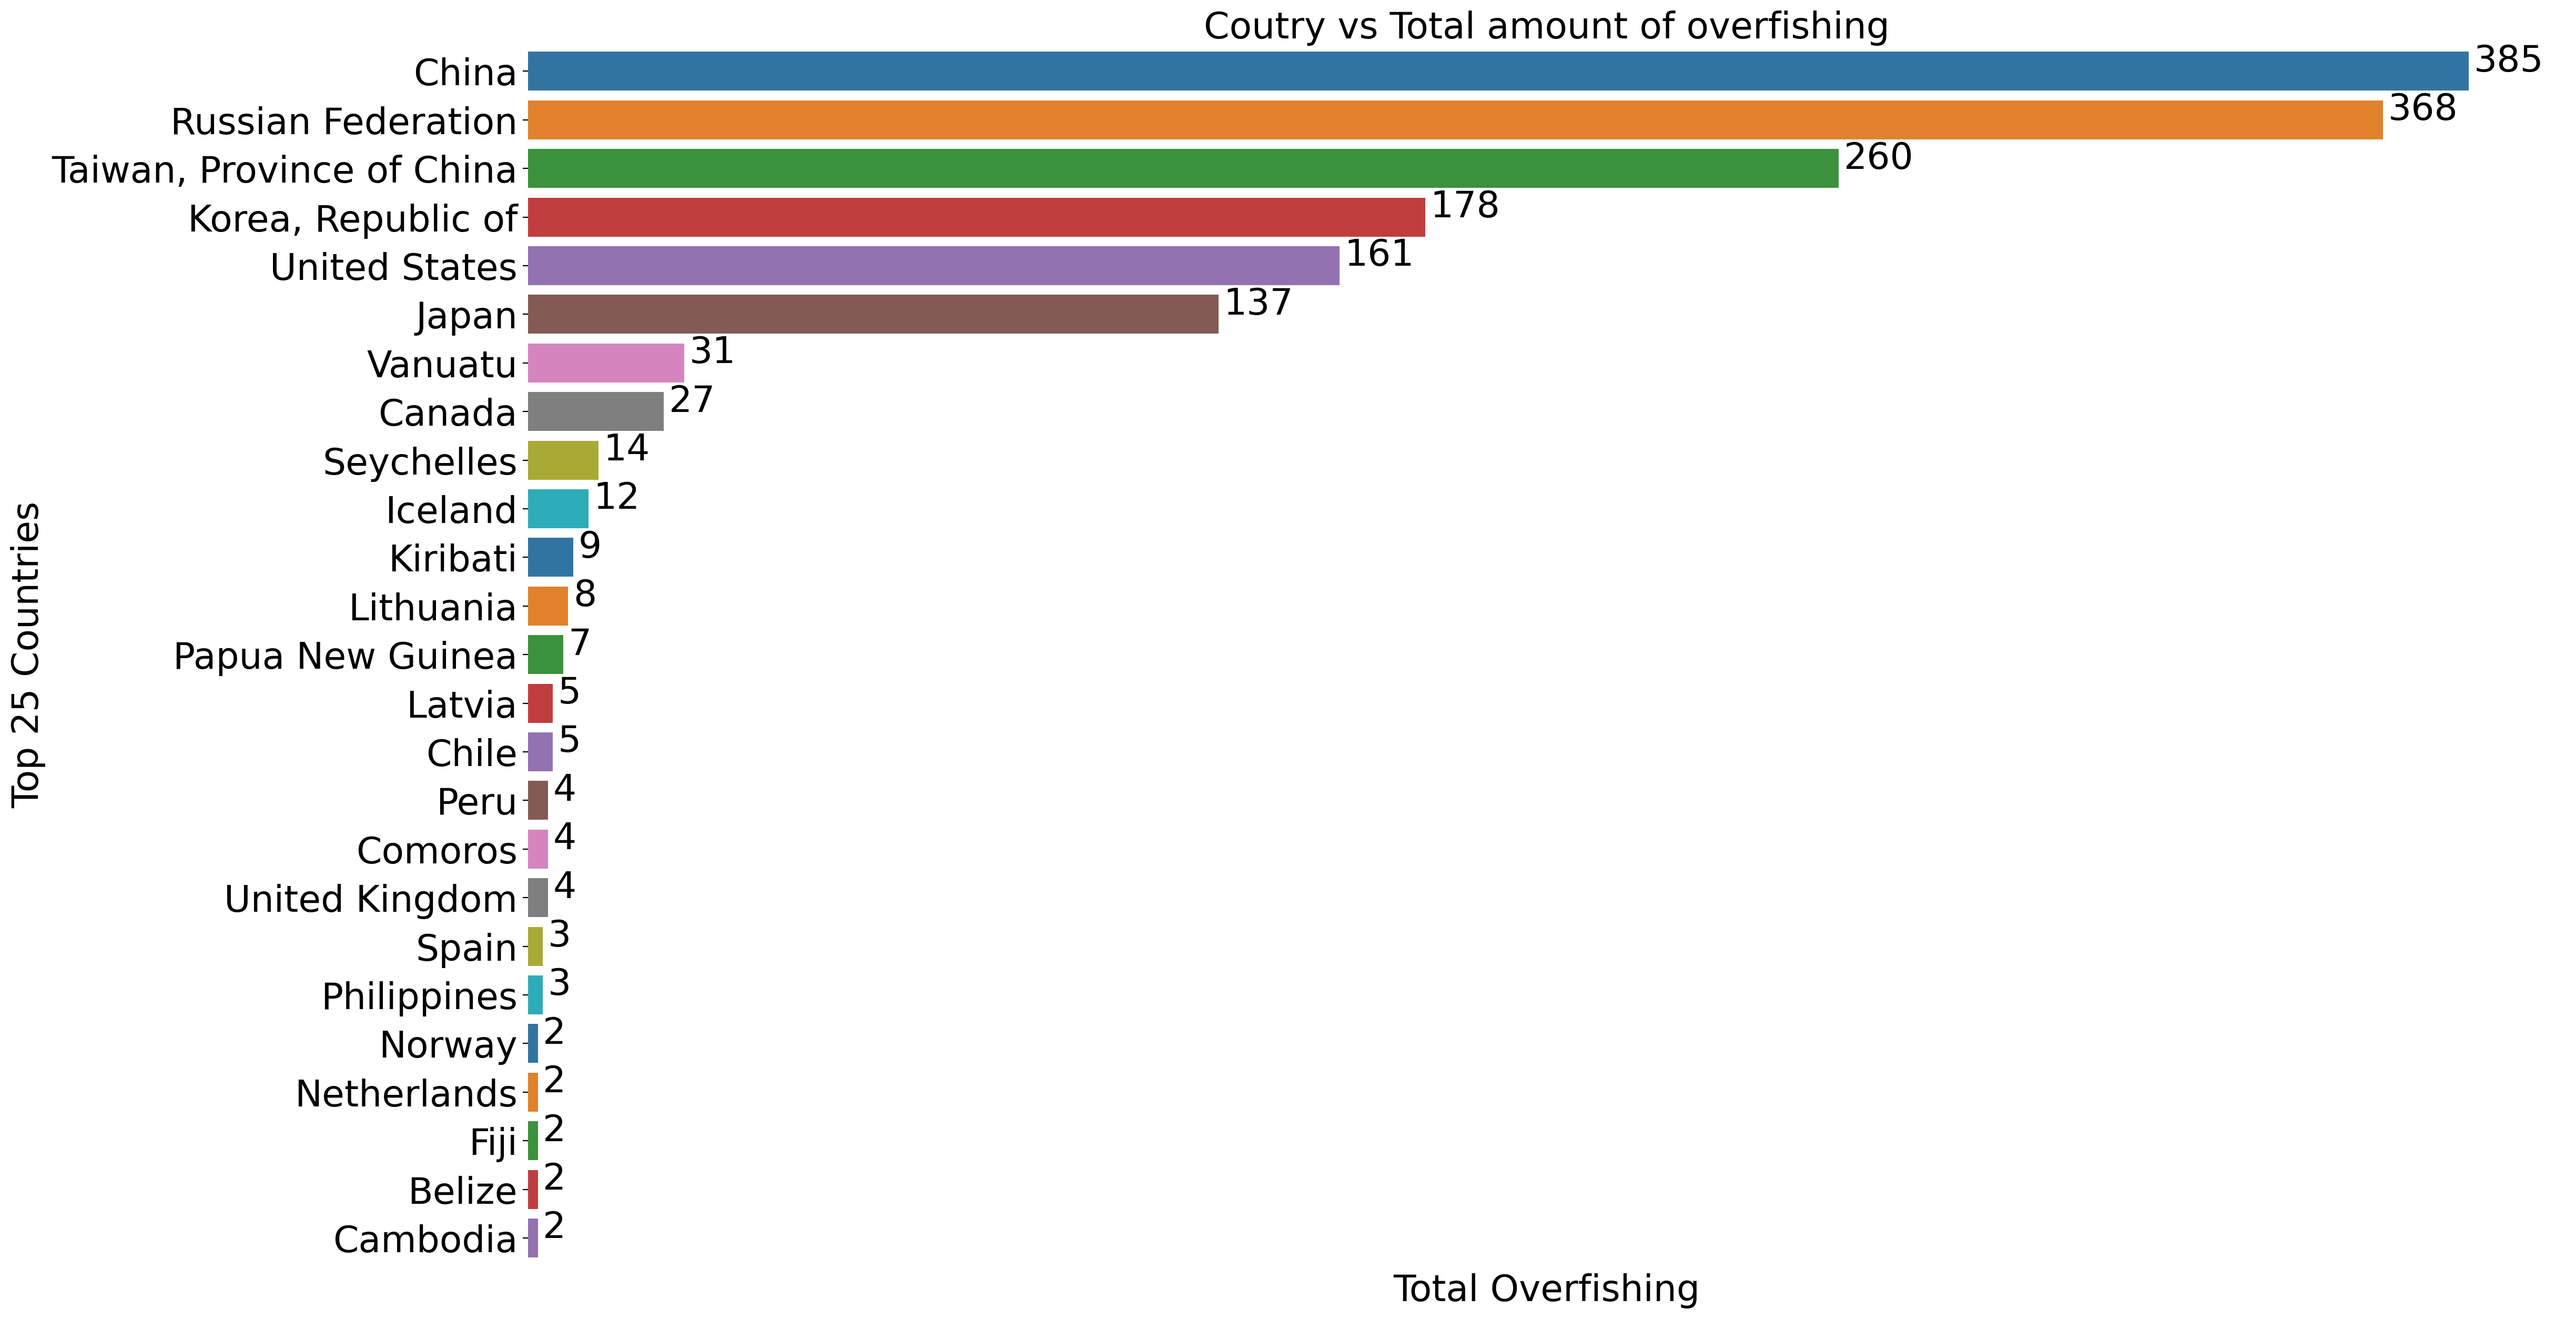

In [5]:
plt.figure(figsize=(25,15))
country_vs_illegal_fishing = df.groupby('country')['illegal_fishing'].sum().sort_values(ascending=False)[:25]
sns.barplot(y = country_vs_illegal_fishing.index, x = country_vs_illegal_fishing.values,palette='tab10')
for index,values in enumerate(country_vs_illegal_fishing.values):
    plt.text(values+1,index,values,fontsize=25)
sns.despine(left=True,bottom=True)
plt.xlabel("Total Overfishing",fontsize=25)
plt.ylabel("Top 25 Countries",fontsize=25)
plt.title("Coutry vs Total amount of overfishing",fontsize=25)
plt.xticks([],fontsize=25)
plt.yticks(fontsize=25);

In [6]:
df['mmsi'].value_counts().sort_values(ascending=True)

603100157    1
701000511    1
701096000    1
701000632    1
701006038    1
            ..
601099800    1
601764000    1
601089100    1
601538000    1
601826000    1
Name: mmsi, Length: 66198, dtype: int64

In [7]:
df["illegal_fishing"].value_counts()

0    64549
1     1649
Name: illegal_fishing, dtype: int64

In [8]:
df["gear_type"].unique()

array(['trawlers', 'purse_seines', 'fixed_gear', 'squid_jigger',
       'other_fishing', 'drifting_longlines'], dtype=object)

In [9]:
'''import cv2
import matplotlib.pyplot as plt

# Load the image using cv2.imread()
img = cv2.imread("s.jpg")

print("Purse_seines")

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

print("Trawlers")

img2 = cv2.imread("pelagic-midwater-trawl-hero.jpg")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()


print("Squid_jigger")

img2 = cv2.imread("sq.jpg")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

print("Drifting_longlines")

img2 = cv2.imread("long.png")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()
'''




'import cv2\nimport matplotlib.pyplot as plt\n\n# Load the image using cv2.imread()\nimg = cv2.imread("s.jpg")\n\nprint("Purse_seines")\n\n# Display the image using matplotlib\nplt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))\nplt.show()\n\nprint("Trawlers")\n\nimg2 = cv2.imread("pelagic-midwater-trawl-hero.jpg")\nplt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))\nplt.show()\n\n\nprint("Squid_jigger")\n\nimg2 = cv2.imread("sq.jpg")\nplt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))\nplt.show()\n\nprint("Drifting_longlines")\n\nimg2 = cv2.imread("long.png")\nplt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))\nplt.show()\n'

In [10]:
df.describe()

,mmsi,length,tonnage,engine_power,IUU Fishing,illegal_fishing
count,6.619800e+04,66198.000000,66198.000000,66198.000000,66198.000000,66198.000000
mean,4.099500e+08,25.570647,164.723933,436.829401,3.398349,0.024910
std,1.734474e+08,11.493177,414.749714,558.803305,0.778243,0.155852
min,9.100000e+01,5.974774,1.000000,14.000000,1.430000,0.000000
25%,2.738294e+08,18.603873,44.953373,225.438069,2.500000,0.000000
50%,4.124113e+08,23.500000,81.688920,316.498895,3.930000,0.000000
75%,4.124702e+08,29.974307,143.767258,444.013388,3.930000,0.000000
max,1.012475e+09,144.600000,14055.000000,14601.395619,3.930000,1.000000


In [11]:
df12 = pd.DataFrame(df["country"].unique())
df12
df12.to_csv("country.csv", index = False)

In [12]:
df['mmsi'] = df['mmsi'].astype(str)

In [13]:
df["mmsi"].str[:1].value_counts()

4    38380
2    15314
9     3191
3     3083
8     2959
1     1063
5      838
7      714
6      656
Name: mmsi, dtype: int64

<div class="alert alert-block alert-info"">
0 Ship group, coast station, or group of coast stations<br>
1 For use by SAR aircraft (111MIDaxx)<br>
2-7 MMSI's used by individual ships, beginning with an MID:<br>
2 Europe (e.g., Italy has MID 247; Denmark has MIDs 219 and 220)<br>
3 North and Central America and Caribbean (e.g., Canada, 316; Greenland, 331; Panama, 351 through 357, plus 370 through 373; United States, 303(Alaska), 338(domestic), plus 366 through 369)<br>
4 Asia (not the southeast) (e.g., PRC, 412, 413, and 414; Maldives, 455; Japan, 431)<br>
5 Oceania (Australia, 503; New Zealand, 512), and Southeast Asia (Philippines, 548; Indonesia, 525)<br>
6 Africa (Eritrea, 625)<br>
7 South America (Peru, 760)<br>
8 Handheld VHF transceiver with DSC and GNSS<br>
9 Devices using a free-form number identity<br>
                                          </div>

In [14]:
df.dtypes

mmsi                object
gear_type           object
length             float64
tonnage            float64
engine_power       float64
country             object
IUU Fishing        float64
illegal_fishing      int64
dtype: object

In [15]:
df.isnull().sum()

mmsi               0
gear_type          0
length             0
tonnage            0
engine_power       0
country            0
IUU Fishing        0
illegal_fishing    0
dtype: int64

In [16]:
label=["gear_type","country"]

In [17]:
from sklearn.preprocessing import LabelEncoder

df[label] = df[label].apply(LabelEncoder().fit_transform)

df[label].head()

,gear_type,country
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2


In [18]:
df.head(1)

,mmsi,gear_type,length,tonnage,engine_power,country,IUU Fishing,illegal_fishing
0,603100157,5,32.808468,299.003814,733.826977,2,2.37,0


In [19]:
!pip install opencv-python


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_14420\1816386778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues',annot=True)


<AxesSubplot: >

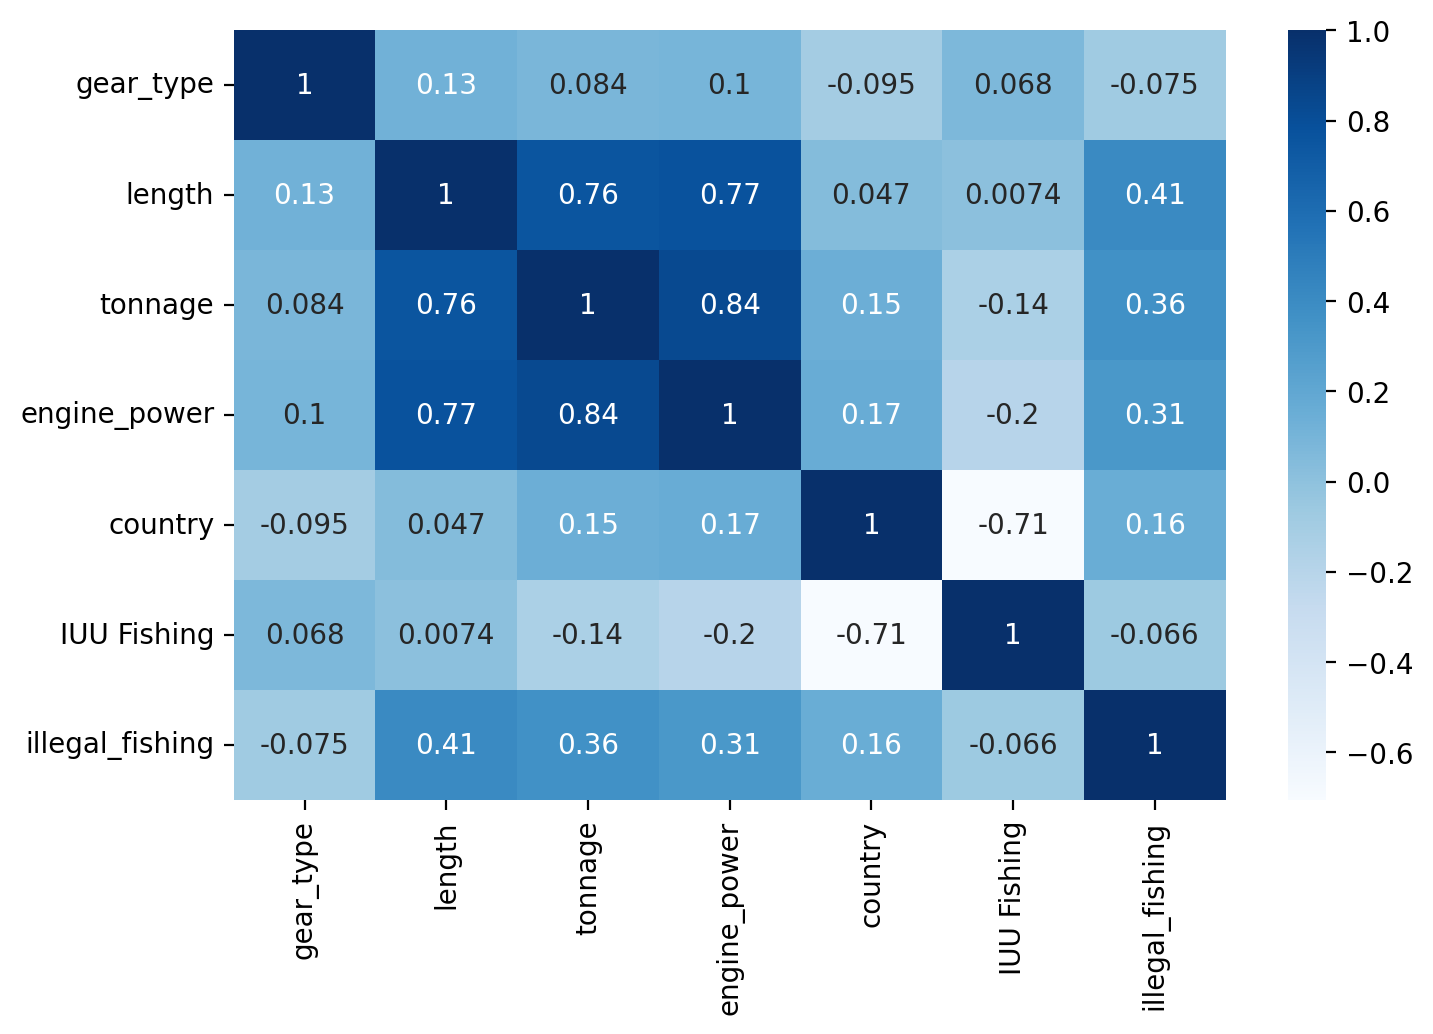

In [21]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [22]:
accidents_by_cities = df['country'].value_counts()
accidents_by_cities

15    43852
67     2138
98     2076
88     1841
44     1532
      ...  
68        1
81        1
37        1
60        1
80        1
Name: country, Length: 102, dtype: int64

In [23]:
country_vs_illegal_fishing

country
China                        385
Russian Federation           368
Taiwan, Province of China    260
Korea, Republic of           178
United States                161
Japan                        137
Vanuatu                       31
Canada                        27
Seychelles                    14
Iceland                       12
Kiribati                       9
Lithuania                      8
Papua New Guinea               7
Latvia                         5
Chile                          5
Peru                           4
Comoros                        4
United Kingdom                 4
Spain                          3
Philippines                    3
Norway                         2
Netherlands                    2
Fiji                           2
Belize                         2
Cambodia                       2
Name: illegal_fishing, dtype: int64

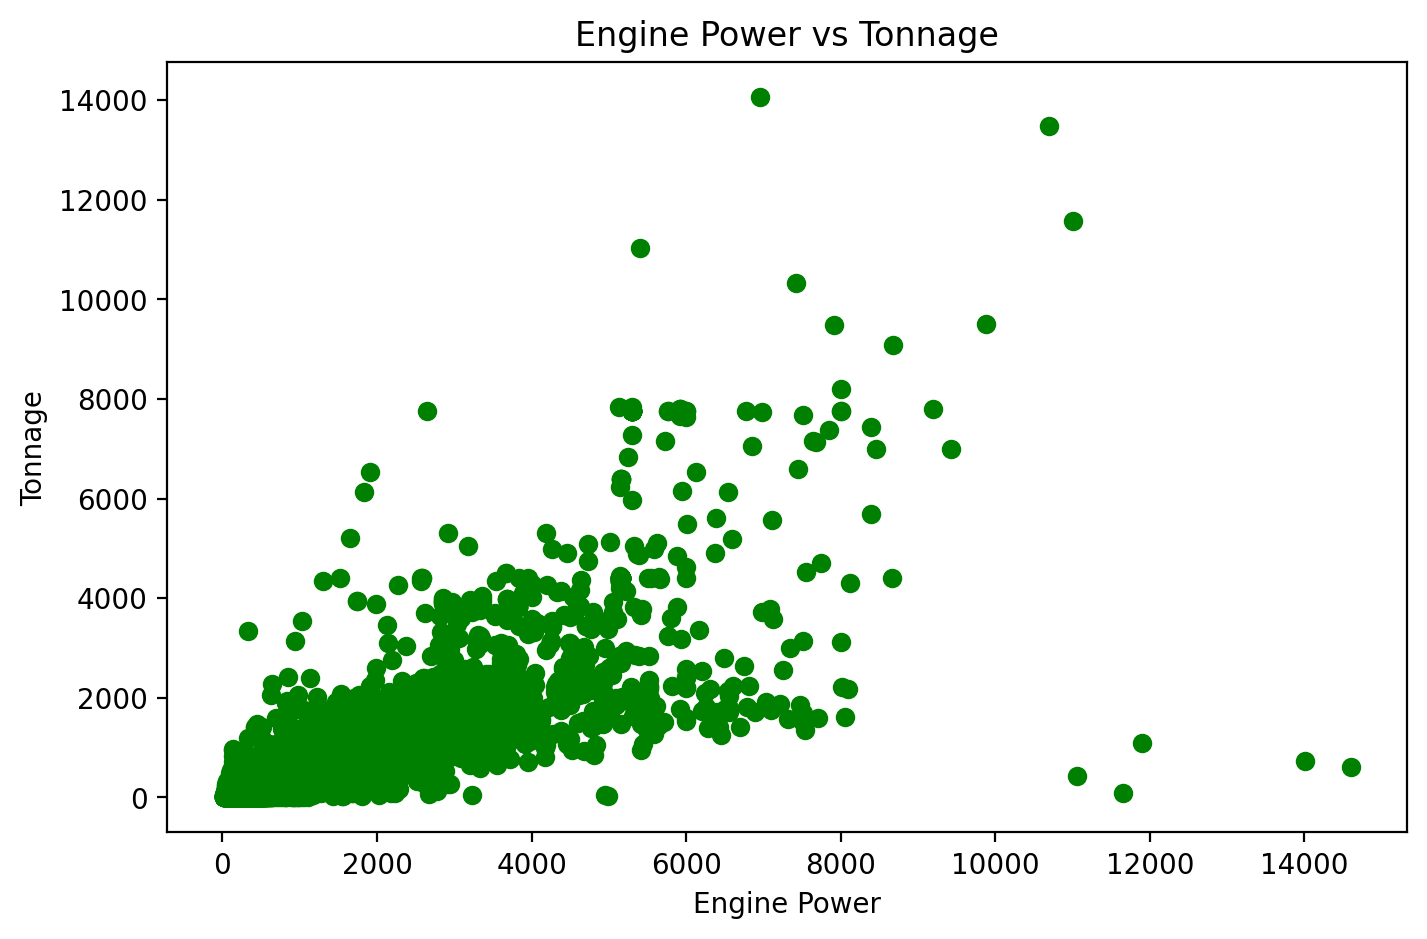

In [24]:
colors = ['green']

plt.scatter(df["engine_power"], df["tonnage"],c=colors)
plt.xlabel("Engine Power")
plt.ylabel("Tonnage")
plt.title("Engine Power vs Tonnage")
plt.show()

In [25]:
import matplotlib.pyplot as matplotlib

In [26]:
from folium import plugins 
%config InlineBackend.figure_format = 'retina' #Use this %config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 8, 5 #You can dynamically change the default rc (runtime configuration) settings in a python 
#script or interactively from the python shell.
pd.options.mode.chained_assignment = None  #The warning went away and my code runs faster. 
pd.set_option('display.max_columns',None)

In [27]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)


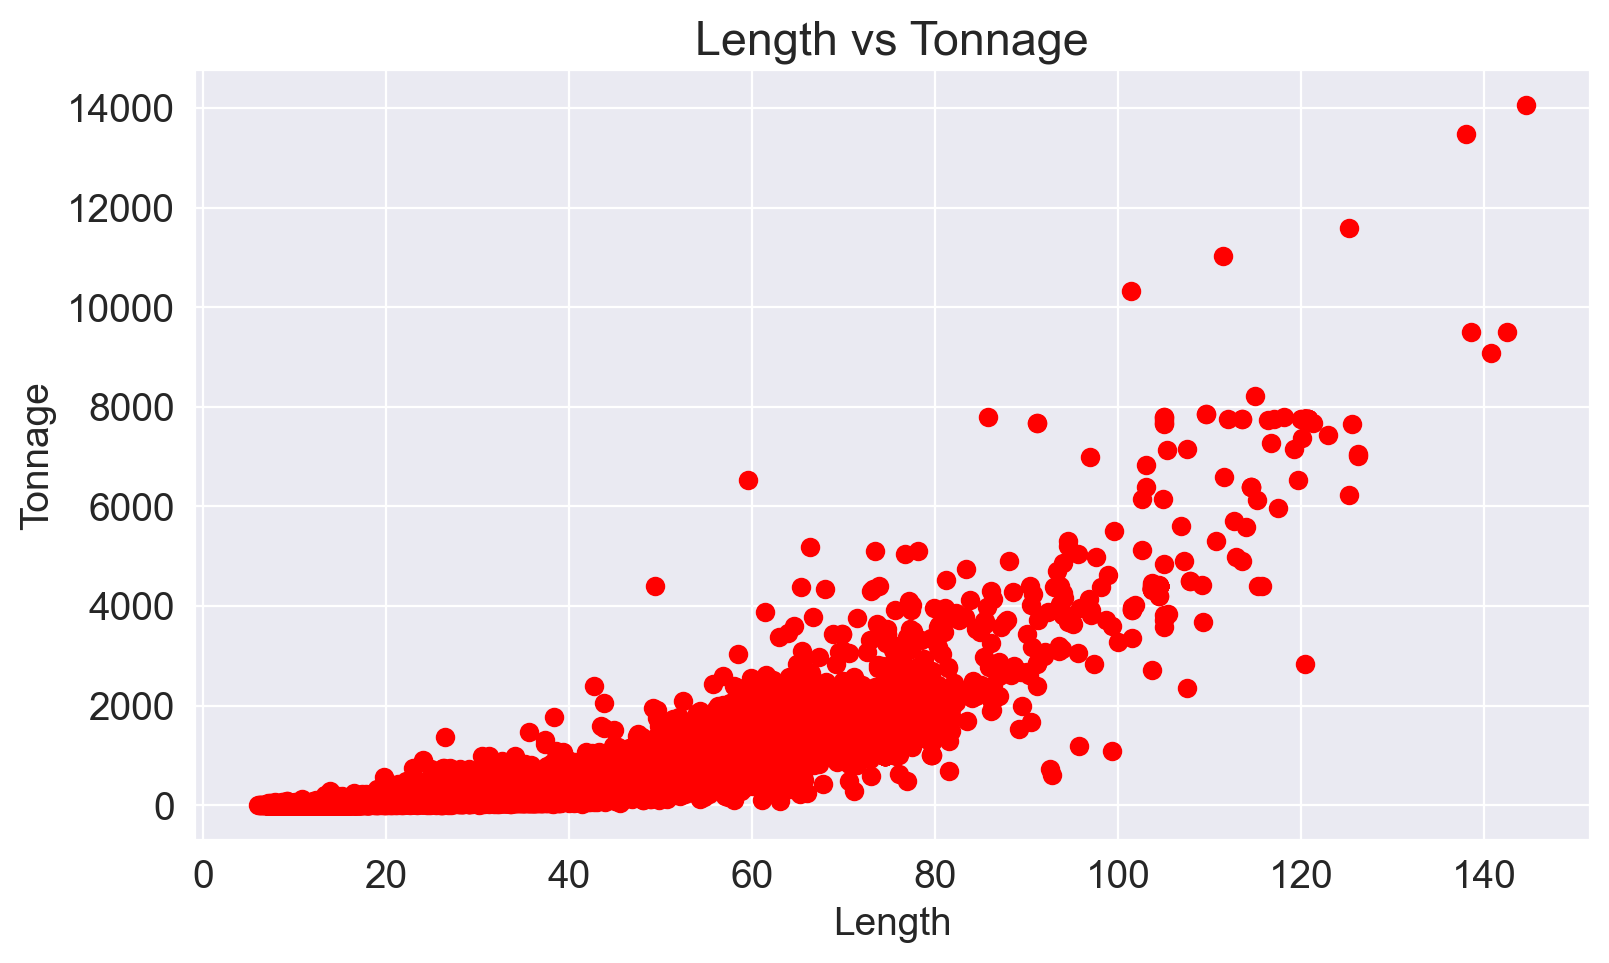

In [28]:
colors = ['red']

plt.scatter(df["length"], df["tonnage"],c=colors)
plt.xlabel("Length")
plt.ylabel("Tonnage")
plt.title("Length vs Tonnage")
plt.show()

In [29]:
df

,mmsi,gear_type,length,tonnage,engine_power,country,IUU Fishing,illegal_fishing
0,603100157,5,32.808468,299.003814,733.826977,2,2.37,0
1,603100137,5,34.568782,395.683171,864.960188,2,2.37,0
2,603100161,5,28.822140,263.849149,651.809642,2,2.37,0
3,603100174,5,30.721429,299.700916,703.796086,2,2.37,0
4,603100164,5,37.479248,405.967747,850.976640,2,2.37,0
...,...,...,...,...,...,...,...,...
66193,601764000,0,17.032258,52.550920,207.818629,87,2.43,0
66194,601089100,0,22.915622,180.506028,527.507463,87,2.43,0
66195,601849000,0,19.692080,86.485661,362.553279,87,2.43,0
66196,601183700,0,31.872860,307.446773,977.330342,87,2.43,0


In [30]:
df_il=df[df["illegal_fishing"]==1]

In [31]:
df_il

,mmsi,gear_type,length,tonnage,engine_power,country,IUU Fishing,illegal_fishing
427,503584700,2,23.009784,78.895456,394.867663,4,1.91,1
704,312189000,5,91.266155,3728.303685,5058.439324,7,1.78,1
708,312060000,5,98.924118,4633.918999,5994.924487,7,1.78,1
798,316002919,5,27.778518,156.438762,723.915281,12,1.97,1
814,316003365,5,23.527775,237.000000,638.123238,12,1.97,1
...,...,...,...,...,...,...,...,...
65966,576737000,0,58.700000,638.000000,1036.700000,100,2.55,1
65968,576596000,0,51.025155,567.712176,1046.615461,100,2.55,1
65969,576890000,0,46.770000,412.278443,895.200000,100,2.55,1
65973,576877000,0,50.276313,498.450936,903.568931,100,2.55,1


In [32]:
df_nil=df[df["illegal_fishing"]==0]

In [33]:
df_nil["country"].max()

101

In [34]:
df_nil["country"].unique()

array([  2,   0,   3,   4,   6,   9,   5,   7,   8,  12,  14,  15,  23,
        11,  18,  16,  17,  13,  19,  21,  22,  33,  25,  24,   1,  26,
        88,  29,  31,  30,  32,  59,  97,  34,  28,  35,  36,  37,  20,
        40,  39,  42,  41,  38,  43,  44,  45,  10,  46,  78,  47,  49,
        50,  89,  51,  48,  61,  53,  58,  55,  54,  60,  62,  56,  57,
        52,  63,  66,  64,  67,  65,  69,  71,  72,  70,  73,  74,  75,
        76,  77,  81,  82,  84,  86,  27,  80,  85,  90,  83,  93,  94,
        95,  91,  92,  96,  99,  98,  79, 101, 100,  87])

In [35]:
for i in range (0,102):
    cont=df_nil[df_nil["country"]==i].shape[0]
    print("Country ", i ," = ",cont)

Country  0  =  4
Country  1  =  4
Country  2  =  11
Country  3  =  293
Country  4  =  169
Country  5  =  98
Country  6  =  82
Country  7  =  23
Country  8  =  70
Country  9  =  44
Country  10  =  9
Country  11  =  2
Country  12  =  516
Country  13  =  6
Country  14  =  73
Country  15  =  43467
Country  16  =  16
Country  17  =  6
Country  18  =  10
Country  19  =  1
Country  20  =  233
Country  21  =  1
Country  22  =  21
Country  23  =  1
Country  24  =  619
Country  25  =  2
Country  26  =  21
Country  27  =  6
Country  28  =  1
Country  29  =  34
Country  30  =  41
Country  31  =  53
Country  32  =  1004
Country  33  =  206
Country  34  =  66
Country  35  =  423
Country  36  =  2
Country  37  =  1
Country  38  =  1111
Country  39  =  93
Country  40  =  45
Country  41  =  31
Country  42  =  240
Country  43  =  22
Country  44  =  1532
Country  45  =  716
Country  46  =  9
Country  47  =  1219
Country  48  =  66
Country  49  =  2
Country  50  =  7
Country  51  =  31
Country  52  =  88


In [36]:
df_nil

,mmsi,gear_type,length,tonnage,engine_power,country,IUU Fishing,illegal_fishing
0,603100157,5,32.808468,299.003814,733.826977,2,2.37,0
1,603100137,5,34.568782,395.683171,864.960188,2,2.37,0
2,603100161,5,28.822140,263.849149,651.809642,2,2.37,0
3,603100174,5,30.721429,299.700916,703.796086,2,2.37,0
4,603100164,5,37.479248,405.967747,850.976640,2,2.37,0
...,...,...,...,...,...,...,...,...
66193,601764000,0,17.032258,52.550920,207.818629,87,2.43,0
66194,601089100,0,22.915622,180.506028,527.507463,87,2.43,0
66195,601849000,0,19.692080,86.485661,362.553279,87,2.43,0
66196,601183700,0,31.872860,307.446773,977.330342,87,2.43,0


In [37]:

df_nil=df_nil[df_nil["country"] != 15]

In [38]:
df_nil

,mmsi,gear_type,length,tonnage,engine_power,country,IUU Fishing,illegal_fishing
0,603100157,5,32.808468,299.003814,733.826977,2,2.37,0
1,603100137,5,34.568782,395.683171,864.960188,2,2.37,0
2,603100161,5,28.822140,263.849149,651.809642,2,2.37,0
3,603100174,5,30.721429,299.700916,703.796086,2,2.37,0
4,603100164,5,37.479248,405.967747,850.976640,2,2.37,0
...,...,...,...,...,...,...,...,...
66193,601764000,0,17.032258,52.550920,207.818629,87,2.43,0
66194,601089100,0,22.915622,180.506028,527.507463,87,2.43,0
66195,601849000,0,19.692080,86.485661,362.553279,87,2.43,0
66196,601183700,0,31.872860,307.446773,977.330342,87,2.43,0


In [39]:
df=pd.concat([df_il,df_nil])

In [40]:
df

,mmsi,gear_type,length,tonnage,engine_power,country,IUU Fishing,illegal_fishing
427,503584700,2,23.009784,78.895456,394.867663,4,1.91,1
704,312189000,5,91.266155,3728.303685,5058.439324,7,1.78,1
708,312060000,5,98.924118,4633.918999,5994.924487,7,1.78,1
798,316002919,5,27.778518,156.438762,723.915281,12,1.97,1
814,316003365,5,23.527775,237.000000,638.123238,12,1.97,1
...,...,...,...,...,...,...,...,...
66193,601764000,0,17.032258,52.550920,207.818629,87,2.43,0
66194,601089100,0,22.915622,180.506028,527.507463,87,2.43,0
66195,601849000,0,19.692080,86.485661,362.553279,87,2.43,0
66196,601183700,0,31.872860,307.446773,977.330342,87,2.43,0


In [41]:
df = df.sample(frac=1).reset_index(drop=True)

In [42]:
df

,mmsi,gear_type,length,tonnage,engine_power,country,IUU Fishing,illegal_fishing
0,710241263,5,19.198106,44.888047,274.126643,8,2.13,0
1,271072131,3,23.000000,67.495298,297.120588,95,2.34,0
2,244592000,5,35.197902,214.711998,751.490543,64,2.02,0
3,234417000,1,20.840000,177.000000,388.000000,97,2.19,0
4,263406490,3,24.110000,65.670000,316.920000,74,2.45,0
...,...,...,...,...,...,...,...,...
22726,416002453,0,21.914473,127.070286,381.700332,91,3.34,0
22727,247120310,5,16.150000,21.000000,198.500000,44,2.50,0
22728,627151000,5,31.309793,147.207170,871.619795,34,1.98,0
22729,440124240,3,28.677109,80.784115,711.392943,47,2.49,0


In [336]:
!pip install imblearn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
X = df.drop("illegal_fishing",axis=1)
y = df["illegal_fishing"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 


In [46]:
print("Before Over Sampling, count of the label '1': {}".format(sum(y_train == 1)))  
print("Before Over Sampling, count of the label '0': {} \n".format(sum(y_train == 0)))  
from imblearn.over_sampling import SMOTE  
sm1 = SMOTE(random_state = 2)  
X_train_sh, y_train_sh = sm1.fit_resample(X_train, y_train.ravel())  
print('After Over Sampling, the shape of the train_X: {}'.format(X_train_sh.shape))  
print('After Over Sampling, the shape of the train_y: {} \n'.format(y_train_sh.shape))  
print("After Over Sampling, count of the label '1': {}".format(sum(y_train_sh == 1)))  
print("After Over Sampling, count of the label '0': {}".format(sum(y_train_sh == 0))) 

Before Over Sampling, count of the label '1': 1307
Before Over Sampling, count of the label '0': 16877 

After Over Sampling, the shape of the train_X: (33754, 7)
After Over Sampling, the shape of the train_y: (33754,) 

After Over Sampling, count of the label '1': 16877
After Over Sampling, count of the label '0': 16877


In [47]:
X_train

,mmsi,gear_type,length,tonnage,engine_power,country,IUU Fishing
19686,710289219,1,29.496405,132.215021,465.921265,8,2.13
20256,760012074,3,48.818098,698.718408,1618.291333,71,2.21
21216,247143760,3,17.920000,31.000000,206.000000,44,2.50
8656,245883000,5,21.720000,43.000000,188.000000,64,2.02
15626,211618000,5,16.310000,25.000000,219.000000,33,1.89
...,...,...,...,...,...,...,...
13123,271072079,3,27.500000,102.000000,204.016297,95,2.34
19648,503772000,3,30.653459,205.924626,754.824125,4,1.91
9845,271070002,3,37.170011,290.835064,615.382493,95,2.34
10799,235095223,1,11.827906,30.000000,164.168190,97,2.19


In [48]:
X_train_sh

,mmsi,gear_type,length,tonnage,engine_power,country,IUU Fishing
0,710289219.0,1,29.496405,132.215021,465.921265,8,2.13
1,760012074.0,3,48.818098,698.718408,1618.291333,71,2.21
2,247143760.0,3,17.920000,31.000000,206.000000,44,2.50
3,245883000.0,5,21.720000,43.000000,188.000000,64,2.02
4,211618000.0,5,16.310000,25.000000,219.000000,33,1.89
...,...,...,...,...,...,...,...
33749,416242658.779676,1,53.882179,578.292391,1237.842262,91,3.34
33750,441808331.727446,2,69.968155,1344.080638,2624.680454,47,2.49
33751,416723732.922378,1,57.841625,641.781827,1311.908860,91,3.34
33752,273848947.608977,5,53.734627,840.813535,1037.167978,77,3.16


In [49]:
df_34 = pd.DataFrame(X_train_sh)

In [50]:
df_34

,mmsi,gear_type,length,tonnage,engine_power,country,IUU Fishing
0,710289219.0,1,29.496405,132.215021,465.921265,8,2.13
1,760012074.0,3,48.818098,698.718408,1618.291333,71,2.21
2,247143760.0,3,17.920000,31.000000,206.000000,44,2.50
3,245883000.0,5,21.720000,43.000000,188.000000,64,2.02
4,211618000.0,5,16.310000,25.000000,219.000000,33,1.89
...,...,...,...,...,...,...,...
33749,416242658.779676,1,53.882179,578.292391,1237.842262,91,3.34
33750,441808331.727446,2,69.968155,1344.080638,2624.680454,47,2.49
33751,416723732.922378,1,57.841625,641.781827,1311.908860,91,3.34
33752,273848947.608977,5,53.734627,840.813535,1037.167978,77,3.16


In [51]:
y_train

19686    0
20256    0
21216    0
8656     0
15626    0
        ..
13123    0
19648    0
9845     0
10799    0
2732     0
Name: illegal_fishing, Length: 18184, dtype: int64

In [53]:
y_train_sh

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [54]:
rf = RandomForestClassifier()
rf.fit(X_train_sh, y_train_sh)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nMSE:",mse)


Accuracy: 0.9582142071695624

MSE: 0.04178579283043765


### Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
X = df.drop("illegal_fishing",axis=1)
y = df["illegal_fishing"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=32)
 
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nMSE:",mse)


Accuracy: 0.9650711513583441

MSE: 0.03492884864165589


### Logistic Regression Classifier

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lr = LogisticRegression()
lr.fit(X_train_sh, y_train_sh)

# Transform the test data using the trained LDA model


# Use the trained logistic regression model to make predictions on the transformed test data
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nMSE:",mse)


Accuracy: 0.6659335825819221

MSE: 0.33406641741807785


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [57]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Load the iris dataset

X = df.drop("illegal_fishing",axis=1)
y = df["illegal_fishing"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize LDA model and fit the training data



# Train a logistic regression model on the transformed training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Transform the test data using the trained LDA model


# Use the trained logistic regression model to make predictions on the transformed test data
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nMSE:",mse)


Accuracy: 0.9247855729052122

MSE: 0.07521442709478778


### Naive Bayes Classifier

In [58]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train_sh, y_train_sh)  
y_pred = classifier.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nMSE:",mse)


Accuracy: 0.7156366835276006

MSE: 0.2843633164723994


In [59]:
from sklearn.preprocessing import StandardScaler 
X = df.drop("illegal_fishing",axis=1)
y = df["illegal_fishing"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nMSE:",mse)


Accuracy: 0.922146470200132

MSE: 0.07785352979986805


### SVM Classifier

In [60]:
from sklearn.preprocessing import StandardScaler 
X = df.drop("illegal_fishing",axis=1)
y = df["illegal_fishing"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  
y_pred= classifier.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nMSE:",mse)


Accuracy: 0.9489773477017814

MSE: 0.051022652298218604


In [61]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Load the iris dataset

X = df.drop("illegal_fishing",axis=1)
y = df["illegal_fishing"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize LDA model and fit the training data
lda = LinearDiscriminantAnalysis()
X_train_transformed = lda.fit_transform(X_train, y_train)

# Train a logistic regression model on the transformed training data
lr = LogisticRegression()
lr.fit(X_train_transformed, y_train)

# Transform the test data using the trained LDA model
X_test_transformed = lda.transform(X_test)

# Use the trained logistic regression model to make predictions on the transformed test data
y_pred = lr.predict(X_test_transformed)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nMSE:",mse)


Accuracy: 0.9454585440950077

MSE: 0.054541455904992306


## Finding n component of pca via elbow method

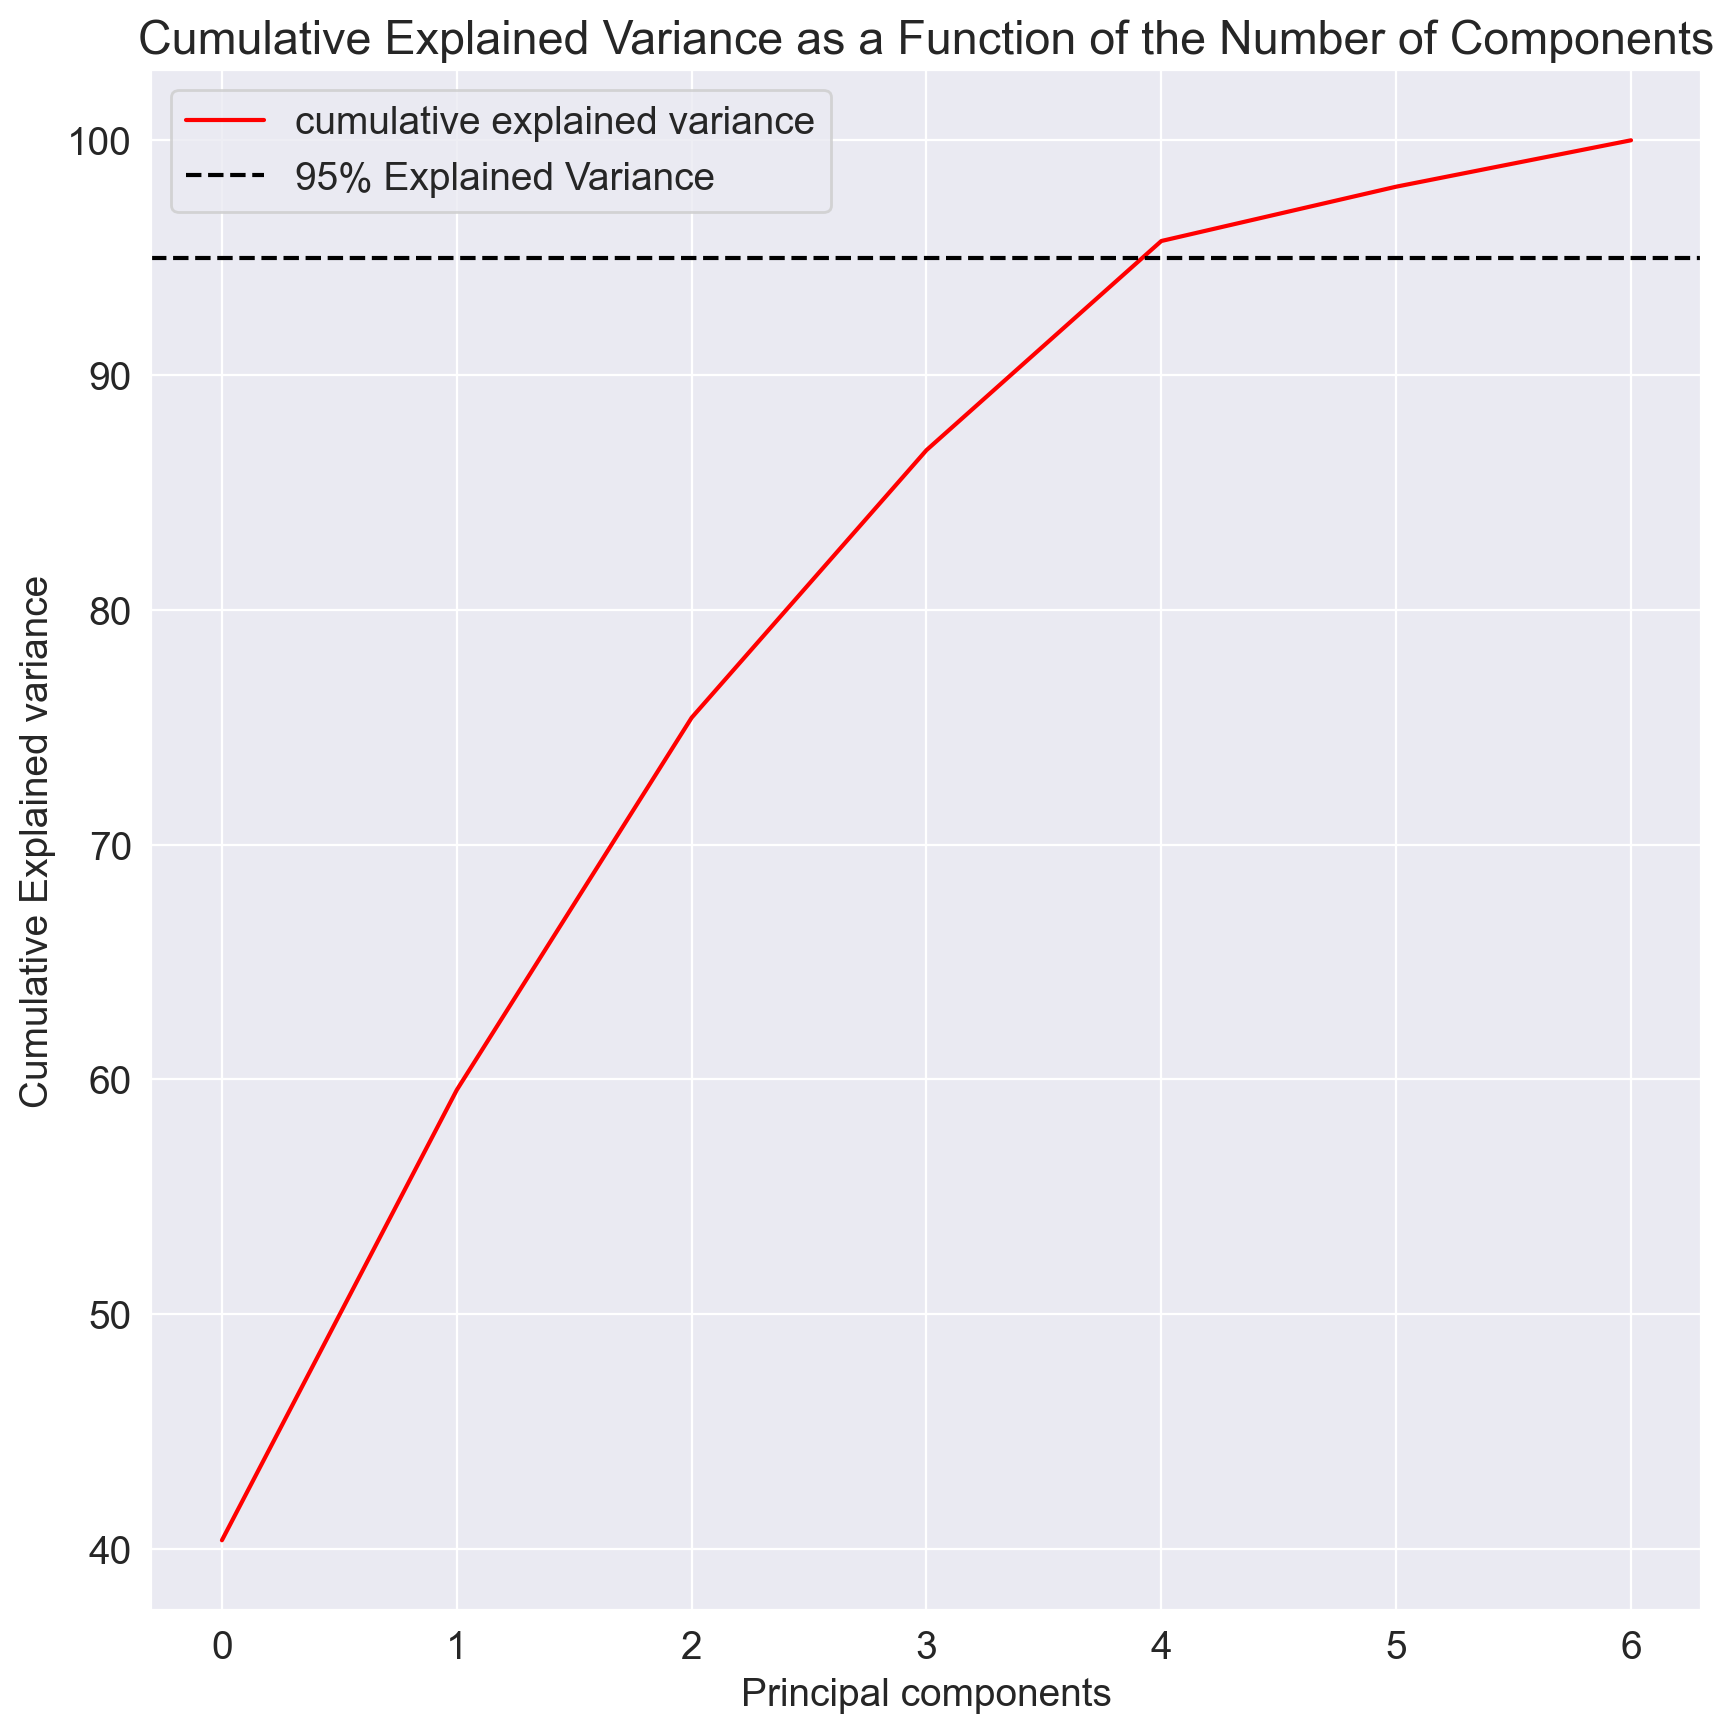

In [62]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the iris dataset
X = df.drop("illegal_fishing",axis=1)
y = df["illegal_fishing"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Using elbow-plot variance/dimensions
 
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')



### Using RF after pca

In [63]:
from sklearn.decomposition import PCA
pca = PCA(4) 
pca.fit(X_train)

x_train_pca = pca.transform(X_train)
test_pca = pca.transform(X_test)

rf = RandomForestClassifier()
rf.fit(x_train_pca, y_train)
y_pred = rf.predict(test_pca)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nMSE:",mse)

Accuracy: 0.964811963932263

MSE: 0.03518803606773697


Explained variance ratio: [1.00000000e+00 7.13204599e-11 5.76798647e-12 5.15148705e-14]


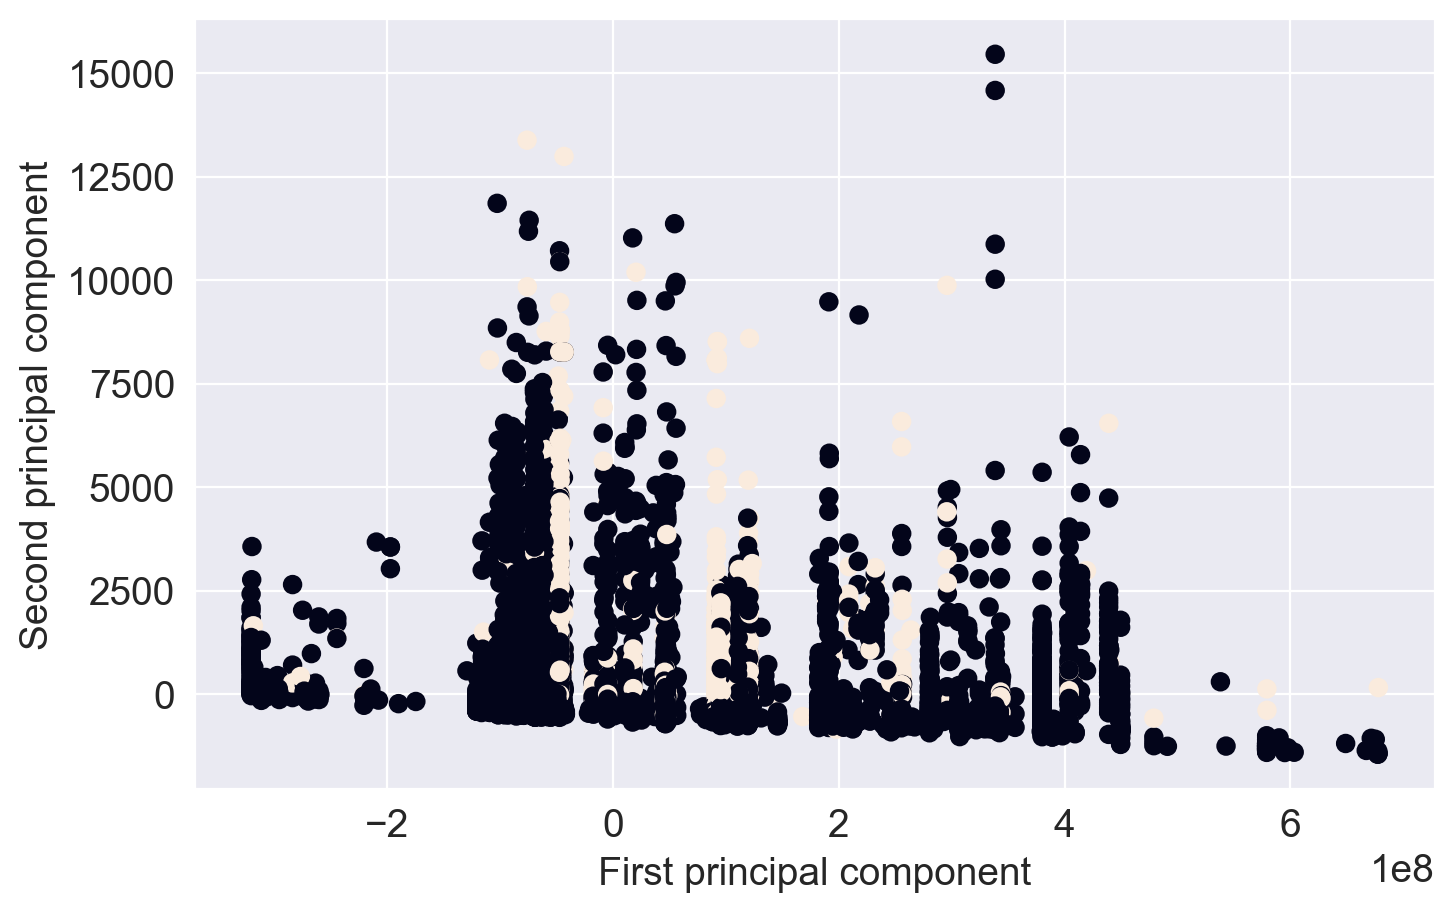

In [64]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the iris dataset
X = df.drop("illegal_fishing",axis=1)
y = df["illegal_fishing"]

# Initialize PCA model and fit the data
pca = PCA(n_components=4)
X_transformed = pca.fit_transform(X)

# Print the explained variance ratio of the principal components
print("Explained variance ratio: {}".format(pca.explained_variance_ratio_))

# Visualize the transformed data
import matplotlib.pyplot as plt
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

## Using RF after LDA

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = df.drop("illegal_fishing",axis=1)
y = df["illegal_fishing"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 
lda=LinearDiscriminantAnalysis(n_components=1)
X_train_transformeu=lda.fit_transform(X_train,y_train)

X_test=lda.transform(X_test)


rf = RandomForestClassifier()
rf.fit(X_train_transformeu, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:",accuracy)
print("\nMSE:",mse)

Accuracy: 0.9318231801187596

MSE: 0.06817681988124037
